# **problem: identify the potato leaf disease**

transfer learning method is used to train this model.

> model=inceptionv3




In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
#importing required libraries
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense, Flatten

In [ ]:
image_size=[224,224]

In [ ]:
#using pretrained model for training data,[3]-RGB,include_top=False(we don't need the last layer because we have only three classes)
inseption_v3 = InceptionV3(input_shape=image_size+[3],weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
#for gettig the path of the image folder by using glob
from glob import glob

In [ ]:

categories=glob('/content/drive/MyDrive/cnnidtec/PlantVillage/*')
categories

['/content/drive/MyDrive/cnnidtec/PlantVillage/Potato___Early_blight',
 '/content/drive/MyDrive/cnnidtec/PlantVillage/Potato___Late_blight',
 '/content/drive/MyDrive/cnnidtec/PlantVillage/Potato___healthy']

In [ ]:
# understanding the output classes
for i in categories:
  print(i.split('/')[-1])
  


Potato___Early_blight
Potato___Late_blight
Potato___healthy


In [ ]:
#we only train our model with the existing weights of the pretrained model 
for layer in inseption_v3 .layers:

  layer.trainable = False

In [ ]:
inseption_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

Here we can see in this model we created the first layer by our own demand(input),and last layer there is no 1000 nodes

In [ ]:
#flatten the output of the model
x = Flatten()(inseption_v3.output)

In [ ]:
len(categories)

3

In [ ]:
#this is our dense layer with three node(len(categories)),and softmax activation function is used this is better for multiclassification
prediction = Dense(len(categories), activation='softmax')(x)

# create a model object
model = Model(inputs=inseption_v3.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)#spliting the data for validation(test_set)

In [ ]:
train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cnnidtec/PlantVillage',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 1722 images belonging to 3 classes.


In [ ]:
test_set= train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cnnidtec/PlantVillage', 
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 430 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
54/54 [==============================] - 763s 14s/step - loss: 0.5959 - accuracy: 0.8995 - val_loss: 0.2939 - val_accuracy: 0.9256
Epoch 2/20
54/54 [==============================] - 174s 3s/step - loss: 0.4296 - accuracy: 0.9117 - val_loss: 0.5033 - val_accuracy: 0.9186
Epoch 3/20
54/54 [==============================] - 175s 3s/step - loss: 0.3596 - accuracy: 0.9408 - val_loss: 0.4142 - val_accuracy: 0.9233
Epoch 4/20
54/54 [==============================] - 174s 3s/step - loss: 0.2958 - accuracy: 0.9448 - val_loss: 0.9440 - val_accuracy: 0.9256
Epoch 5/20
54/54 [==============================] - 175s 3s/step - loss: 0.1977 - accuracy: 0.9617 - val_loss: 0.9298 - val_accuracy: 0.9116
Epoch 6/20
54/54 [==============================] - 174s 3s/step - loss: 0.3883 - accuracy: 0.9448 - val_loss: 0.5277 - val_accuracy: 0.9372
Epoch 7/20
54/54 [==============================] - 174s 3s/step - loss: 0.4149 - accuracy: 0.9425 - val_loss: 0.4849 - val_accuracy: 0.9442
Epoch 8/20
5

In [ ]:
r.history

{'accuracy': [0.8995354175567627,
  0.9117305278778076,
  0.9407665729522705,
  0.9448316097259521,
  0.9616724848747253,
  0.9448316097259521,
  0.9425086975097656,
  0.9529616832733154,
  0.9773519039154053,
  0.9570267200469971,
  0.9634146094322205,
  0.9576074481010437,
  0.9558652639389038,
  0.9715447425842285,
  0.9744483232498169,
  0.9651567935943604,
  0.976190447807312,
  0.9837398529052734,
  0.9750290513038635,
  0.9628339409828186],
 'loss': [0.5958731174468994,
  0.42958730459213257,
  0.359590083360672,
  0.29579252004623413,
  0.1976960450410843,
  0.38832518458366394,
  0.4148782193660736,
  0.3164599537849426,
  0.12872661650180817,
  0.31512144207954407,
  0.31349608302116394,
  0.3658527433872223,
  0.3450329899787903,
  0.18237558007240295,
  0.1686415672302246,
  0.2506721019744873,
  0.1665593385696411,
  0.10980330407619476,
  0.1556330770254135,
  0.3352092504501343],
 'val_accuracy': [0.9255813956260681,
  0.9186046719551086,
  0.9232558012008667,
  0.925581

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

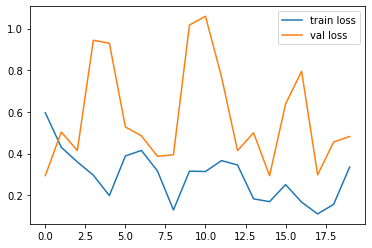

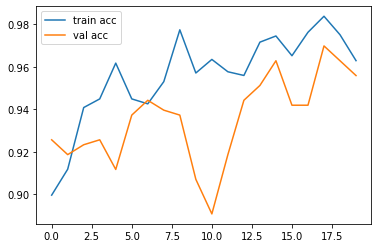

<Figure size 432x288 with 0 Axes>

In [ ]:
#ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3990359e-18, 0.0000000e+00],
       [4.1016440e-31, 1.0000000e+00, 5.3368659e-19],
       ...,
       [1.0000000e+00, 3.4575830e-23, 1.6698202e-27],
       [5.1196987e-21, 1.0000000e+00, 0.0000000e+00],
       [3.4227890e-33, 1.0000000e+00, 7.1059007e-16]], dtype=float32)

In [ ]:
#argmax is used to get the index of maximum value
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0,
       0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
test_set.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [ ]:
#loading an image to check whether the image belongs to which categories.
image_data=image.load_img('/content/drive/MyDrive/cnnidtec/PlantVillage/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(image_data)
x

array([[[161., 140., 147.],
        [134., 113., 120.],
        [132., 111., 118.],
        ...,
        [149., 130., 136.],
        [146., 127., 133.],
        [142., 123., 129.]],

       [[111.,  90.,  97.],
        [153., 132., 139.],
        [182., 161., 168.],
        ...,
        [152., 133., 139.],
        [150., 131., 137.],
        [147., 128., 134.]],

       [[146., 125., 132.],
        [153., 132., 139.],
        [139., 118., 125.],
        ...,
        [152., 133., 139.],
        [151., 132., 138.],
        [149., 130., 136.]],

       ...,

       [[160., 145., 152.],
        [182., 167., 174.],
        [171., 156., 163.],
        ...,
        [158., 145., 155.],
        [167., 154., 164.],
        [178., 165., 175.]],

       [[187., 172., 179.],
        [176., 161., 168.],
        [190., 175., 182.],
        ...,
        [171., 158., 168.],
        [157., 144., 154.],
        [143., 130., 140.]],

       [[197., 182., 189.],
        [184., 169., 176.],
        [188., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
#rescaling the image to 0 to 255 range
x=x/255

In [ ]:
x

array([[[0.6313726 , 0.54901963, 0.5764706 ],
        [0.5254902 , 0.44313726, 0.47058824],
        [0.5176471 , 0.43529412, 0.4627451 ],
        ...,
        [0.58431375, 0.50980395, 0.53333336],
        [0.57254905, 0.49803922, 0.52156866],
        [0.5568628 , 0.48235294, 0.5058824 ]],

       [[0.43529412, 0.3529412 , 0.38039216],
        [0.6       , 0.5176471 , 0.54509807],
        [0.7137255 , 0.6313726 , 0.65882355],
        ...,
        [0.59607846, 0.52156866, 0.54509807],
        [0.5882353 , 0.5137255 , 0.5372549 ],
        [0.5764706 , 0.5019608 , 0.5254902 ]],

       [[0.57254905, 0.49019608, 0.5176471 ],
        [0.6       , 0.5176471 , 0.54509807],
        [0.54509807, 0.4627451 , 0.49019608],
        ...,
        [0.59607846, 0.52156866, 0.54509807],
        [0.5921569 , 0.5176471 , 0.5411765 ],
        [0.58431375, 0.50980395, 0.53333336]],

       ...,

       [[0.627451  , 0.5686275 , 0.59607846],
        [0.7137255 , 0.654902  , 0.68235296],
        [0.67058825, 0

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
x=np.expand_dims(x,axis=0)


In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
img_data1=preprocess_input(x)

In [ ]:
model.predict(img_data1)

array([[7.311498e-03, 9.926847e-01, 3.830987e-06]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data1), axis=1)
a

array([1])

In [ ]:
if (a==0):
  print("Potato___Early_blight")
elif(a==1):
  print("Potato___Late_blight")
else:
  print("Potato___healthy")

Potato___Late_blight
